# 📊 Exploratory Data Analysis: Alzheimer's Disease 🧠  

## Introduction  

Despite the 50 million people already affected by Alzheimer’s disease (AD) worldwide, the WHO estimates that this number will triple by 2050. AD is the most common cause of dementia, accounting for approximately 60 to 80% of all dementia cases (Porsteinsson et al., 2021). It primarily affects older adults and is characterized by progressive cognitive decline.

Alzheimer’s disease is mainly associated with memory impairment in the elderly (Aziz et al., 2017). From a histopathological perspective, it is defined by two types of lesions: the extracellular aggregation of β-amyloid (Aβ) peptide fragments, forming amyloid plaques, and neurofibrillary tangles (NFTs), which are intracellular deposits of hyperphosphorylated tau proteins (He et al., 2020). These abnormalities lead to increased inflammation and cortical atrophy, ultimately resulting in progressive cognitive decline. The disease progresses slowly, with early symptoms typically appearing around the age of 65.

Early and accurate detection is essential for effective patient management and better outcomes (Atri, 2019). However, traditional diagnostic methods, such as neuroimaging and cerebrospinal fluid analysis, are often invasive, expensive, and time-consuming. Advances in artificial intelligence (AI) and machine learning (ML) offer promising alternatives that are non-invasive, efficient, and cost-effective.

In this notebook, we will conduct an **Exploratory Data Analysis (EDA)** on a dataset of Alzheimer's patients. The goal is to examine trends in clinical and demographic data, identify potential early indicators of cognitive decline, and gain insights that could contribute to a better understanding of the disease.  

## Objectives  
🔹 Load and preprocess the dataset  
🔹 Explore demographic and clinical variable distributions  
🔹 Visualize trends and relationships between features  
🔹 Identify potential distinguishing factors  


🔎 **Let’s begin our exploration!** 🚀  



## About Dataset

This dataset contains extensive health information for 2,149 patients, each uniquely identified with IDs ranging from 4751 to 6900. The dataset includes demographic details, lifestyle factors, medical history, clinical measurements, cognitive and functional assessments, symptoms, and a diagnosis of Alzheimer's Disease. The data is ideal for researchers and data scientists looking to explore factors associated with Alzheimer's, develop predictive models, and conduct statistical analyses.


## Citation

@misc{rabie_el_kharoua_2024,
title={Alzheimer's Disease Dataset},
url={https://www.kaggle.com/dsv/8668279},
DOI={10.34740/KAGGLE/DSV/8668279},
publisher={Kaggle},
author={Rabie El Kharoua},
year={2024}
}

# I- Importing libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import shapiro, mannwhitneyu, chi2_contingency

# II - Inspection des données 

## Table of Contents

#### Patient Information

PatientID: A unique identifier assigned to each patient (4751 to 6900).

#### Demographic Details

Age: The age of the patients ranges from 60 to 90 years.
Gender: Gender of the patients, where 0 represents Male and 1 represents Female.
Ethnicity: The ethnicity of the patients, coded as follows:
0: Caucasian
1: African American
2: Asian
3: Other
EducationLevel: The education level of the patients, coded as follows:
0: None
1: High School
2: Bachelor's
3: Higher

#### Lifestyle Factors

BMI: Body Mass Index of the patients, ranging from 15 to 40.
Smoking: Smoking status, where 0 indicates No and 1 indicates Yes.
AlcoholConsumption: Weekly alcohol consumption in units, ranging from 0 to 20.
PhysicalActivity: Weekly physical activity in hours, ranging from 0 to 10.
DietQuality: Diet quality score, ranging from 0 to 10.
SleepQuality: Sleep quality score, ranging from 4 to 10.

#### Medical History

FamilyHistoryAlzheimers: Family history of Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.
CardiovascularDisease: Presence of cardiovascular disease, where 0 indicates No and 1 indicates Yes.
Diabetes: Presence of diabetes, where 0 indicates No and 1 indicates Yes.
Depression: Presence of depression, where 0 indicates No and 1 indicates Yes.
HeadInjury: History of head injury, where 0 indicates No and 1 indicates Yes.
Hypertension: Presence of hypertension, where 0 indicates No and 1 indicates Yes.

#### Clinical Measurements

SystolicBP: Systolic blood pressure, ranging from 90 to 180 mmHg.
DiastolicBP: Diastolic blood pressure, ranging from 60 to 120 mmHg.
CholesterolTotal: Total cholesterol levels, ranging from 150 to 300 mg/dL.
CholesterolLDL: Low-density lipoprotein cholesterol levels, ranging from 50 to 200 mg/dL.
CholesterolHDL: High-density lipoprotein cholesterol levels, ranging from 20 to 100 mg/dL.
CholesterolTriglycerides: Triglycerides levels, ranging from 50 to 400 mg/dL.

#### Cognitive and Functional Assessments

MMSE: Mini-Mental State Examination score, ranging from 0 to 30. Lower scores indicate cognitive impairment.
FunctionalAssessment: Functional assessment score, ranging from 0 to 10. Lower scores indicate greater impairment.
MemoryComplaints: Presence of memory complaints, where 0 indicates No and 1 indicates Yes.
BehavioralProblems: Presence of behavioral problems, where 0 indicates No and 1 indicates Yes.
ADL: Activities of Daily Living score, ranging from 0 to 10. Lower scores indicate greater impairment.

#### Symptoms

Confusion: Presence of confusion, where 0 indicates No and 1 indicates Yes.
Disorientation: Presence of disorientation, where 0 indicates No and 1 indicates Yes.
PersonalityChanges: Presence of personality changes, where 0 indicates No and 1 indicates Yes.
DifficultyCompletingTasks: Presence of difficulty completing tasks, where 0 indicates No and 1 indicates Yes.
Forgetfulness: Presence of forgetfulness, where 0 indicates No and 1 indicates Yes.

#### Diagnosis Information

Diagnosis: Diagnosis status for Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.

#### Confidential Information

DoctorInCharge: This column contains confidential information about the doctor in charge, with "XXXConfid" as the value for all patients.

In [19]:
#Load dataset
df = pd.read_csv('alzheimers_disease_data.csv', sep=',')

#Data observation
print("The dataset contains " + str(df.shape[0]) + " rows and " + str(df.shape[1]) + " columns")
df.head()

The dataset contains 2149 rows and 35 columns


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

PatientID                    0.0
Age                          0.0
Gender                       0.0
Ethnicity                    0.0
EducationLevel               0.0
BMI                          0.0
Smoking                      0.0
AlcoholConsumption           0.0
PhysicalActivity             0.0
DietQuality                  0.0
SleepQuality                 0.0
FamilyHistoryAlzheimers      0.0
CardiovascularDisease        0.0
Diabetes                     0.0
Depression                   0.0
HeadInjury                   0.0
Hypertension                 0.0
SystolicBP                   0.0
DiastolicBP                  0.0
CholesterolTotal             0.0
CholesterolLDL               0.0
CholesterolHDL               0.0
CholesterolTriglycerides     0.0
MMSE                         0.0
FunctionalAssessment         0.0
MemoryComplaints             0.0
BehavioralProblems           0.0
ADL                          0.0
Confusion                    0.0
Disorientation               0.0
Personalit

<Axes: >

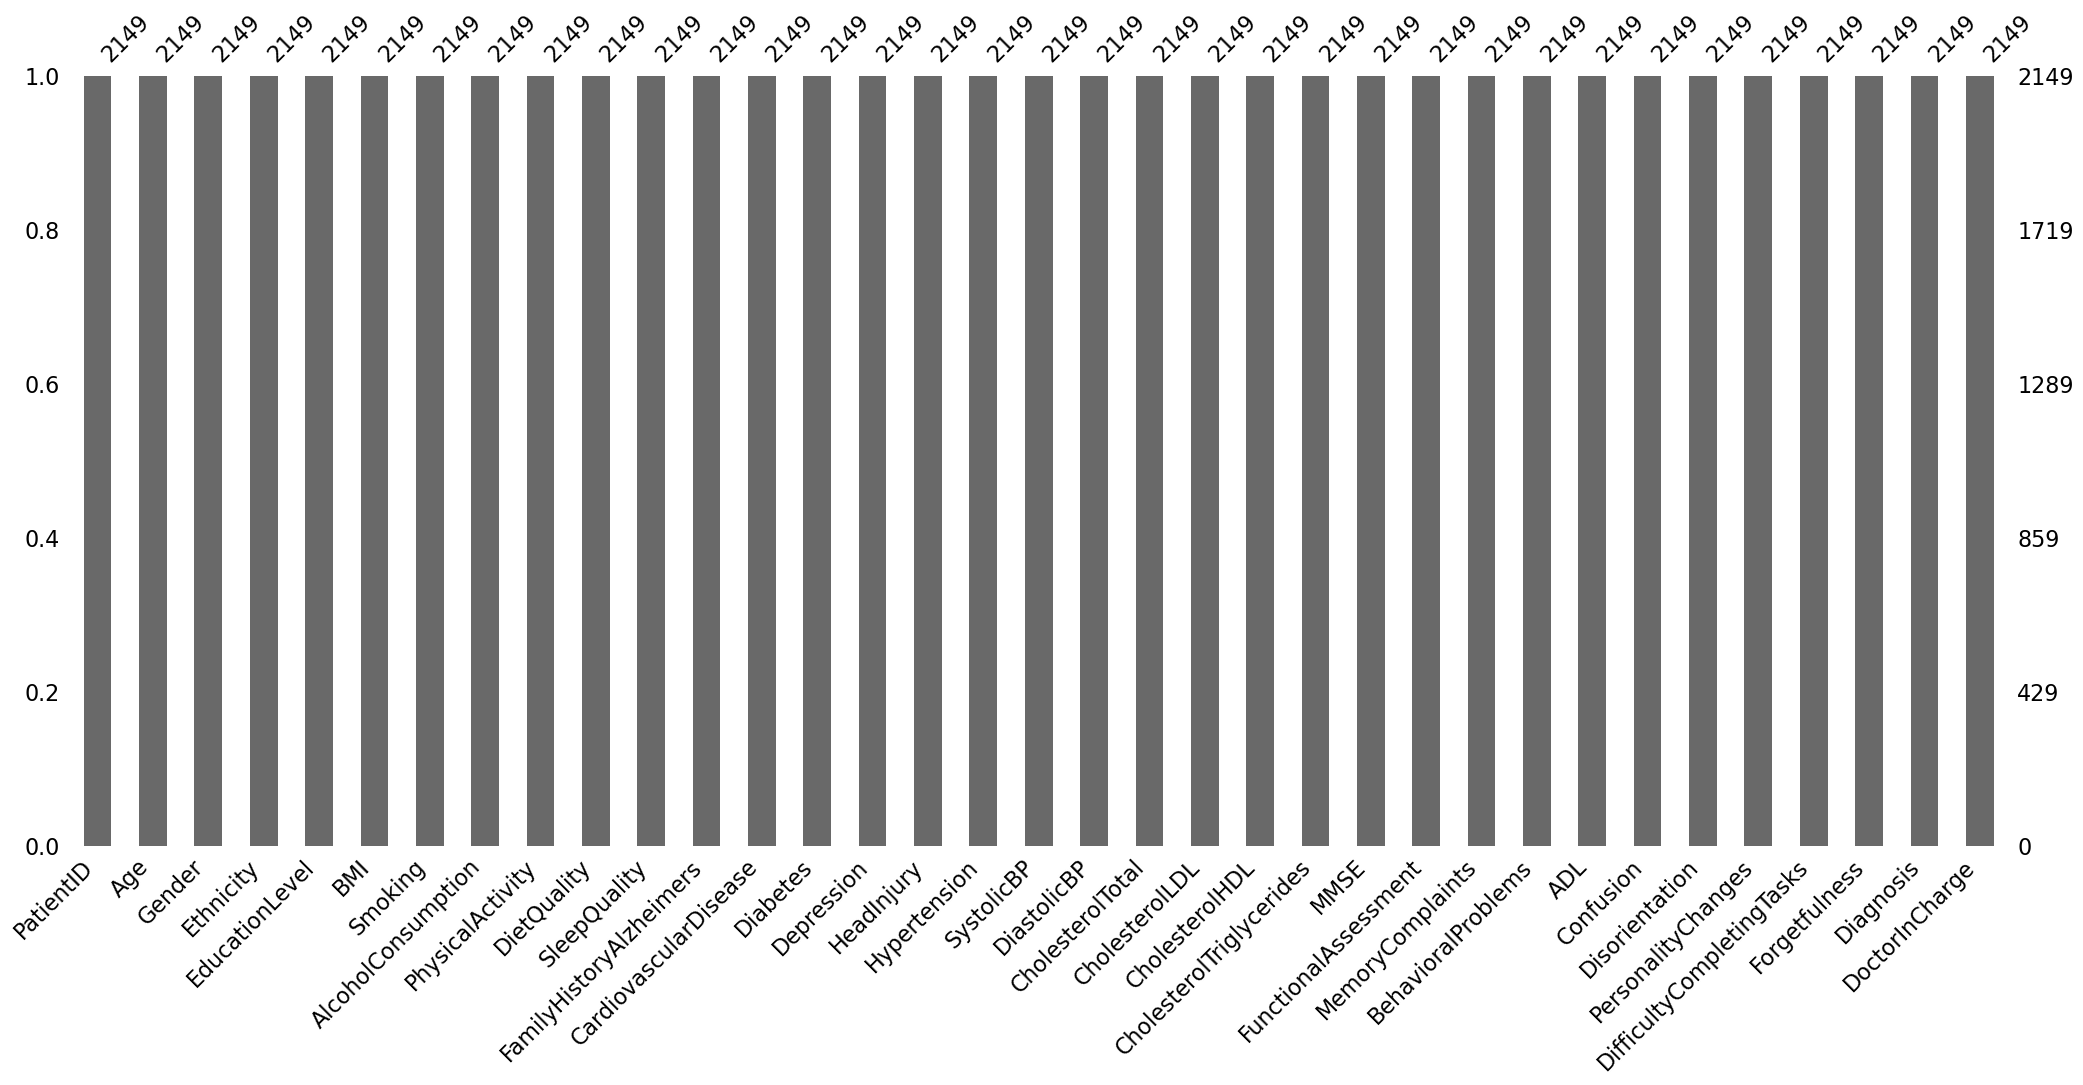

In [21]:
#Are there any missing values ​​in this dataset?
display(df.isna().mean())
msno.bar(df)

In [22]:
#Are there any duplicates?
doublon = df['PatientID'].duplicated().sum()
print("The number of duplicates in the 'PatientID' column is : " + str(doublon))

The number of duplicates in the 'PatientID' column is : 0


In [23]:
#Removed unnecessary columns for the following 
df.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)

In [24]:
df.describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- After removing columns that are not needed for the rest of the project, the dataset consists of 2149 observations and 33 columns.
- The dataset does not contain any missing values
- There are no duplicates in this dataset

## III- Exploratory data analysis

Alzheimer's disease is influenced by a complex combination of genetic, environmental, and behavioral factors. Among the main risk factors, advanced age, generally defined as over 65 years, is crucial, as well as the presence of at least one APOE ε4 allele, which plays an important role in susceptibility to the disease. Gender also plays a significant role, with women being more likely to develop the disease, especially after the age of 80 (Scheltens et al., 2021). In addition, factors associated with cardiovascular diseases, such as hypertension, diabetes, and high cholesterol, as well as an unhealthy lifestyle, are also linked to an increased risk of developing dementia.

A 2017 report from *The Lancet* highlighted that nearly a third of Alzheimer's cases could be attributed to lifestyle factors, such as diet, physical activity, smoking, alcohol consumption, education level and head trauma. These modifiable factors offer opportunities for potentially effective preventative interventions.

Symptoms of Alzheimer's disease progress over time. The disease typically begins with progressively worsening memory loss, followed by increasing difficulty planning and performing tasks in both social and occupational settings. As the disease progresses, patients may develop spatial and temporal disorientation, speech disturbances, and noticeable changes in mood and personality. Respiratory infections often become the most common cause of death in people with Alzheimer's, although the disease can also lead to a variety of other health problems (Burns et al., 1990).

## 3.1 - 'Diagnosis' variable

The variable 'Diagnosis' gives us information about the diagnosis of Alzheimer's disease in our dataset, where 0 indicates No and 1 indicates Yes.

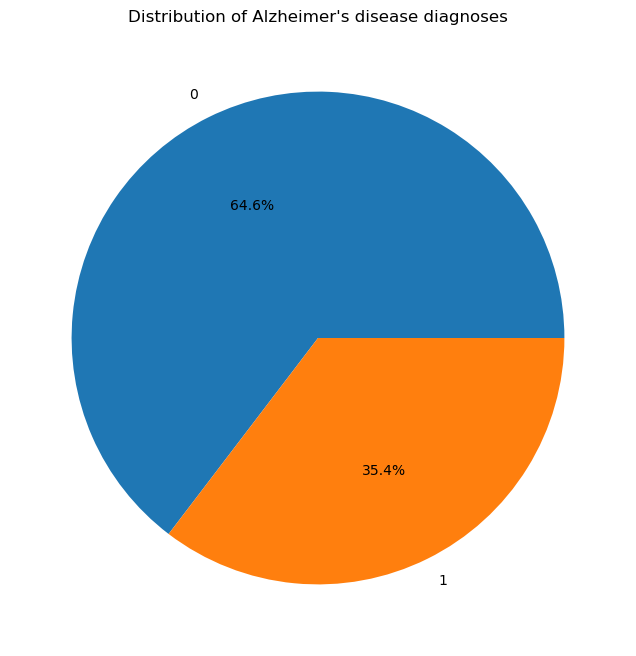

In [25]:
#Count occurrences of each category of 'Diagnosis'
diagnosis_counts = df['Diagnosis'].value_counts()

#Graphical representation
plt.figure(figsize=(8, 8))
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Alzheimer\'s disease diagnoses')
plt.show()

- There is a large disparity between the two groups. The number of patients diagnosed with Alzheimer's disease (1) is 35.4% compared to 64.6% of undiagnosed patients (0).

## 3.2 - Continuous Numerical Variables

Continuous numeric variables are selected to study their distribution and correlation.
To select continuous numeric variables, all variables with a number of unique values ​​greater than 5 are considered continuous numeric variables.

In [26]:
# Selection of continuous numeric variables
colonnes_num_continues = [col for col in df.columns if df[col].nunique() > 5]

### 3.2.1 - Outliers detection

In [27]:
# Function to detect outliers based on IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Outlier detection for each continuous variable
outliers_dict = {}
for col in colonnes_num_continues:
    outliers_dict[col] = detect_outliers_iqr(df, col)
    print(f'{col}: {len(outliers_dict[col])} outliers detected')

Age: 0 outliers detected
BMI: 0 outliers detected
AlcoholConsumption: 0 outliers detected
PhysicalActivity: 0 outliers detected
DietQuality: 0 outliers detected
SleepQuality: 0 outliers detected
SystolicBP: 0 outliers detected
DiastolicBP: 0 outliers detected
CholesterolTotal: 0 outliers detected
CholesterolLDL: 0 outliers detected
CholesterolHDL: 0 outliers detected
CholesterolTriglycerides: 0 outliers detected
MMSE: 0 outliers detected
FunctionalAssessment: 0 outliers detected
ADL: 0 outliers detected


### 3.2.2 - Data Normality

We start by checking for normality, which is necessary for some statistical analys.s.

In [28]:
# Checking the normality of continuous variables
for colonne in colonnes_num_continues:
    stat, p_value = shapiro(df[colonne])
    print(f'{colonne}: p-value = {p_value:.3f}')

Age: p-value = 0.000
BMI: p-value = 0.000
AlcoholConsumption: p-value = 0.000
PhysicalActivity: p-value = 0.000
DietQuality: p-value = 0.000
SleepQuality: p-value = 0.000
SystolicBP: p-value = 0.000
DiastolicBP: p-value = 0.000
CholesterolTotal: p-value = 0.000
CholesterolLDL: p-value = 0.000
CholesterolHDL: p-value = 0.000
CholesterolTriglycerides: p-value = 0.000
MMSE: p-value = 0.000
FunctionalAssessment: p-value = 0.000
ADL: p-value = 0.000


- The set of variables does not follow a normal distribution. This is not necessarily a problem, but it suggests that caution is needed in choosing analysis methods and in interpreting the results for the rest of the project.
- Let's move on to visualizing the distribution of variables to understand the nature of the data

### 3.2.3 - Distribution of variables

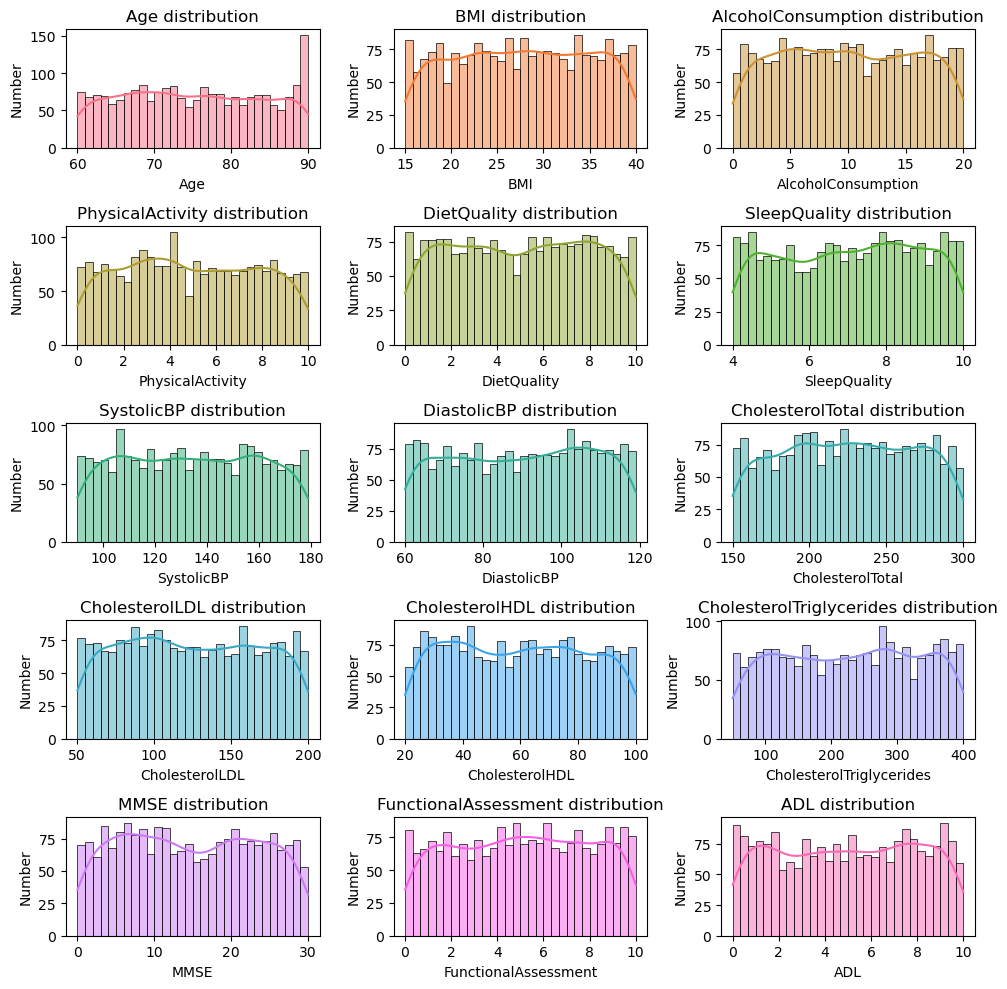

In [29]:
# Defining the color palette
palette_num = sns.color_palette("husl", len(colonnes_num_continues))

# Graphical representation of each column
plt.figure(figsize=(10,10))
for i, colonne in enumerate(colonnes_num_continues):
    plt.subplot((len(colonnes_num_continues) + 2) // 3, 3, i + 1)
    sns.histplot(df[colonne], kde=True, bins=30, color=palette_num[i])
    plt.title(f'{colonne} distribution')
    plt.xlabel(colonne)
    plt.ylabel('Number')
plt.tight_layout()
plt.show()

The distribution of the variables appears uniform, which is consistent with the failure of the Shapiro test because a uniform distribution is very different from a normal distribution. For the future, care should be taken to choose a model that does not require normality.

**Age Distribution**
- The distribution of the age of the patients is relatively uniform, with a wide distribution between 60 and 90 years. This is useful for our analysis, because a balanced representation of different age groups allows a more complete assessment of the effects of age on Alzheimer's disease. The literature highlights that the incidence of the disease increases with age, and such a distribution allows a better understanding of the variations in the prevalence and progression of the disease across different phases of old age.

**BMI (Body Mass Index) Distribution**
- Body mass index (BMI) shows a relatively even distribution. This measure is crucial for assessing potential relationships between obesity or overweight and the risk of developing Alzheimer's. An even distribution of BMI in our sample allows for a more detailed examination of how body weight may influence cognitive health.

**Alcohol Consumption Distribution**
- The distribution of weekly alcohol consumption is also even. Given that studies have suggested a link between alcohol consumption and dementia risk, a balanced distribution in our sample allows for analysis of how consumption levels may affect the risk of Alzheimer's disease.

**Physical Activity Distribution**
- Weekly physical activity is evenly distributed across the sample, which is essential for assessing its potential impact on cognitive health. Recommendations and previous studies indicate that regular exercise can reduce the risk of developing cognitive disorders, and a balanced distribution of this variable allows us to better understand its protective effect.

**Diet Quality Distribution**
- The diet quality score also shows an even distribution. Diet quality is often associated with various aspects of health, including cognitive risk. A balanced distribution helps examine how different levels of diet quality influence Alzheimer’s disease risk.

**Sleep Quality Distribution**
- The distribution of sleep quality scores is relatively even. Given that research suggests that sleep disturbances may impact cognitive health, a balanced distribution allows us to explore how variations in sleep quality may be related to Alzheimer’s disease.

**Systolic and Diastolic Blood Pressure Distribution**
- The distributions of systolic and diastolic blood pressure appear even. Blood pressure is an important cardiovascular risk factor, and its impact on cognitive health is well documented. A uniform distribution of these variables allows for a detailed analysis of their relationship to dementia risk.

**Distribution of Total Cholesterol, LDL, HDL, and Triglycerides**
- The distributions of total cholesterol, LDL, HDL, and triglyceride levels are also uniform. Blood lipids play a role in cardiovascular and cognitive health, and a balanced distribution of these measures allows us to examine how cholesterol and triglyceride levels influence the risk of Alzheimer's disease.

**Distribution of MMSE Score**
- The Mini-Mental State Examination (MMSE) score shows a uniform distribution. The MMSE is a key indicator of cognitive function. A balanced distribution allows us to analyze variation in cognitive abilities across the sample and explore relationships with other variables.

**Distribution of Functional Assessment**
- The distribution of the Functional Assessment score is relatively uniform. This measure assesses general functional abilities and is important for understanding how functional impairments may be related to Alzheimer's disease.

**ADL (Activities of Daily Living) Score Distribution**
- The ADL score shows an even distribution. Activities of daily living are essential for assessing dependence and cognitive function, and a balanced distribution allows for examination of how difficulties in these activities are associated with Alzheimer's disease.

### 3.2.4 - Correlation between variables

We only study the correlation between continuous numerical variables. Studying the correlation of binary variables, such as 'Gender', would be useless because these variables do not have the same variability as continuous data.

Since our data does not follow a normal distribution, we will use Spearman's correlation.

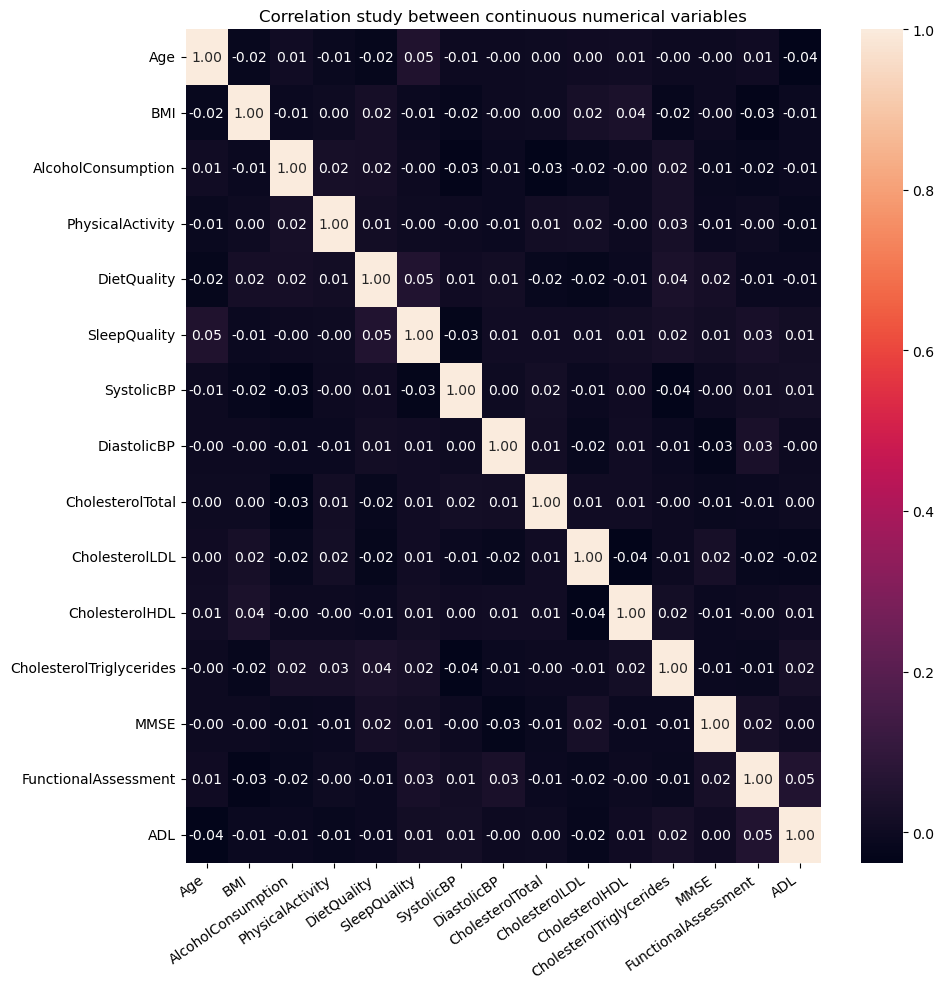

In [30]:
#Correlation study
plt.figure(figsize = (10,10))
sns.heatmap(df[colonnes_num_continues].corr(method='spearman'), annot = True, fmt='.2f')
plt.title('Correlation study between continuous numerical variables')
plt.xticks(rotation=35, ha='right')
plt.tight_layout()
plt.show()

- **Low Correlations**: Correlation values ​​close to zero suggest that continuous numeric variables do not have a significant linear relationship with each other. In other words, changes in one continuous variable are not systematically associated with changes in another variable.

- **Implications for Analysis**: This lack of correlation could indicate that these variables are relatively independent of each other. When building predictive models, it may be relevant to examine these variables individually rather than looking for linear interactions between them.

### 3.2.5 - Distribution as a function of the Diagnosis variable

We will now observe the distribution of these variables as a function of the Diagnosis variable.

For the significance test, we will use the Mann-Whtney U test. This is a non-parametric test that does not make any assumptions about the distribution of the data. This test is appropriate for comparing the distributions of two independent groups.

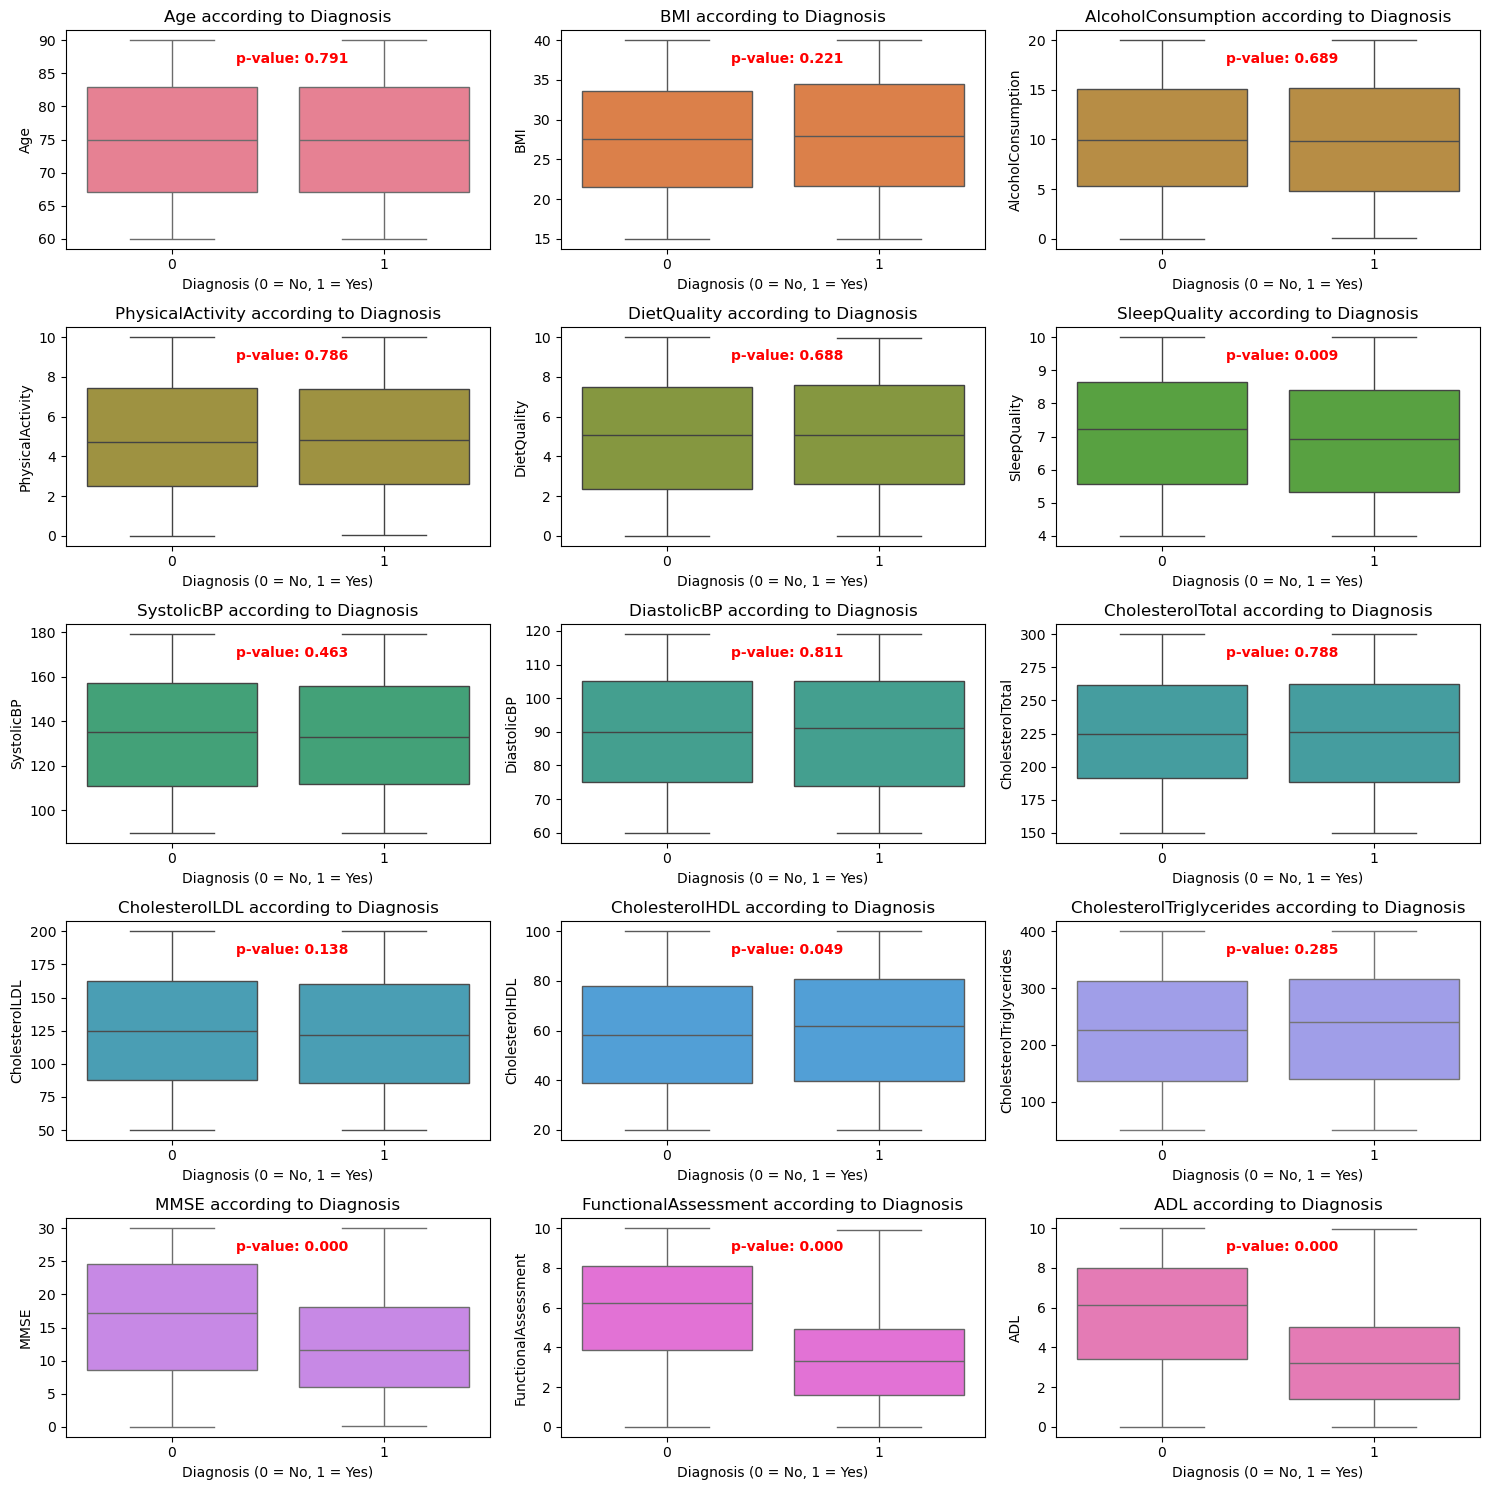

In [31]:
# Graphical representation of each column as a function of the Diagnosis variable with significance test
plt.figure(figsize=(15, 15)) 
for i, colonne in enumerate(colonnes_num_continues):
    plt.subplot((len(colonnes_num_continues) + 2) // 3, 3, i + 1)
    sns.boxplot(x=df["Diagnosis"], y=df[colonne], color=palette_num[i])
    plt.title(f'{colonne} according to Diagnosis')
    plt.xlabel('Diagnosis (0 = No, 1 = Yes)')
    plt.ylabel(colonne)
    
    # Mann-Whitney U test
    group_0 = df[df["Diagnosis"] == 0][colonne]
    group_1 = df[df["Diagnosis"] == 1][colonne]
    stat, p_value = mannwhitneyu(group_0, group_1)
    
    # Displaying p-value on the graph
    ymax = df[colonne].max()
    plt.annotate(f'p-value: {p_value:.3f}', 
                 xy=(0.4, 0.85), xycoords='axes fraction', 
                 fontsize=10, color='red', weight='bold')

plt.tight_layout()
plt.show()

**Sleep quality**:
- **Result**: Patients with Alzheimer's disease have significantly lower sleep quality than undiagnosed patients (p-value: 0.009).
- **Relation to literature**: Sleep quality is often impaired in individuals with Alzheimer's disease. Research indicates that sleep disturbances may serve as early warning signs of this disease *(Casagrande et al., 2022)*. These disturbances play a significant role in disrupting memory consolidation mechanisms and also influence the clearance of metabolites accumulated in synapses, such as amyloid plaques, which are associated with disease progression *(Prince et al., 2013)*.

**HDL cholesterol levels**:
- **Result**: Patients with Alzheimer's disease have significantly higher HDL cholesterol levels than those without the disease (p-value: 0.049).
- **Relation to literature**: The findings regarding HDL cholesterol present a notable complexity. Although high levels of HDL cholesterol are usually associated with better cardiovascular health, research indicates that exceptionally high levels may be linked to pathological processes specific to Alzheimer's disease. Indeed, extreme levels of HDL cholesterol are often associated with complex conditions, and these high levels can lead to HDL particle dysfunction. This dysfunction could reduce the efficiency of HDL particles in transporting essential factors such as apolipoprotein A1 (ApoA1) to the brain, which could contribute to pathological mechanisms in diseases such as Alzheimer's disease *(Kjeldsen et al., 2021)*.

**MMSE (Mini-Mental State Examination) score** :
- **Result** : Patients with Alzheimer's disease have a significantly lower MMSE score than undiagnosed patients (p-value < 0.001).
- **Relation to literature** : The MMSE is a standard tool to assess cognitive abilities and severity of dementia *(Folstein, 1975)*. A low MMSE score is characteristic of cognitive impairment in Alzheimer's disease. Patients with Alzheimer's disease show cognitive deficits that are clearly manifested in tests of memory, attention, and language, as measured by the MMSE.

**Functional Assessment Score** :
- **Result** : Patients with Alzheimer's disease have a significantly lower functional assessment score than undiagnosed patients (p-value < 0.001).
- **Relation to literature** : Functional assessment measures the impact of the disease on the ability to perform activities of daily living. Functional deterioration is a key feature of Alzheimer's disease progression, with patients progressively losing their autonomy and requiring increasing assistance. Low scores reflect deficits in daily activities and the ability to manage household and personal tasks.

**ADL (Activities of Daily Living)** :
- **Result** : Patients with Alzheimer's disease have a significantly lower ADL score than undiagnosed patients (p-value < 0.001).
- **Relation to literature**: ADLs assess the ability to perform essential activities such as personal hygiene, meal management, and self-care. Patients with Alzheimer's disease show deficits in these activities as the disease progresses, which is consistent with the results of various studies. A decrease in ADL scores is often used as an indicator of the severity of dementia and the need for additional assistance *(Zhou et al, 2022)*.

## 3.3 - Numerical categorical variables

In [32]:
# Selection of continuous numeric variables
colonnes_cat = df.columns.difference(colonnes_num_continues).difference(['Diagnosis']).to_list()

### 3.3.1 - Variable distribution

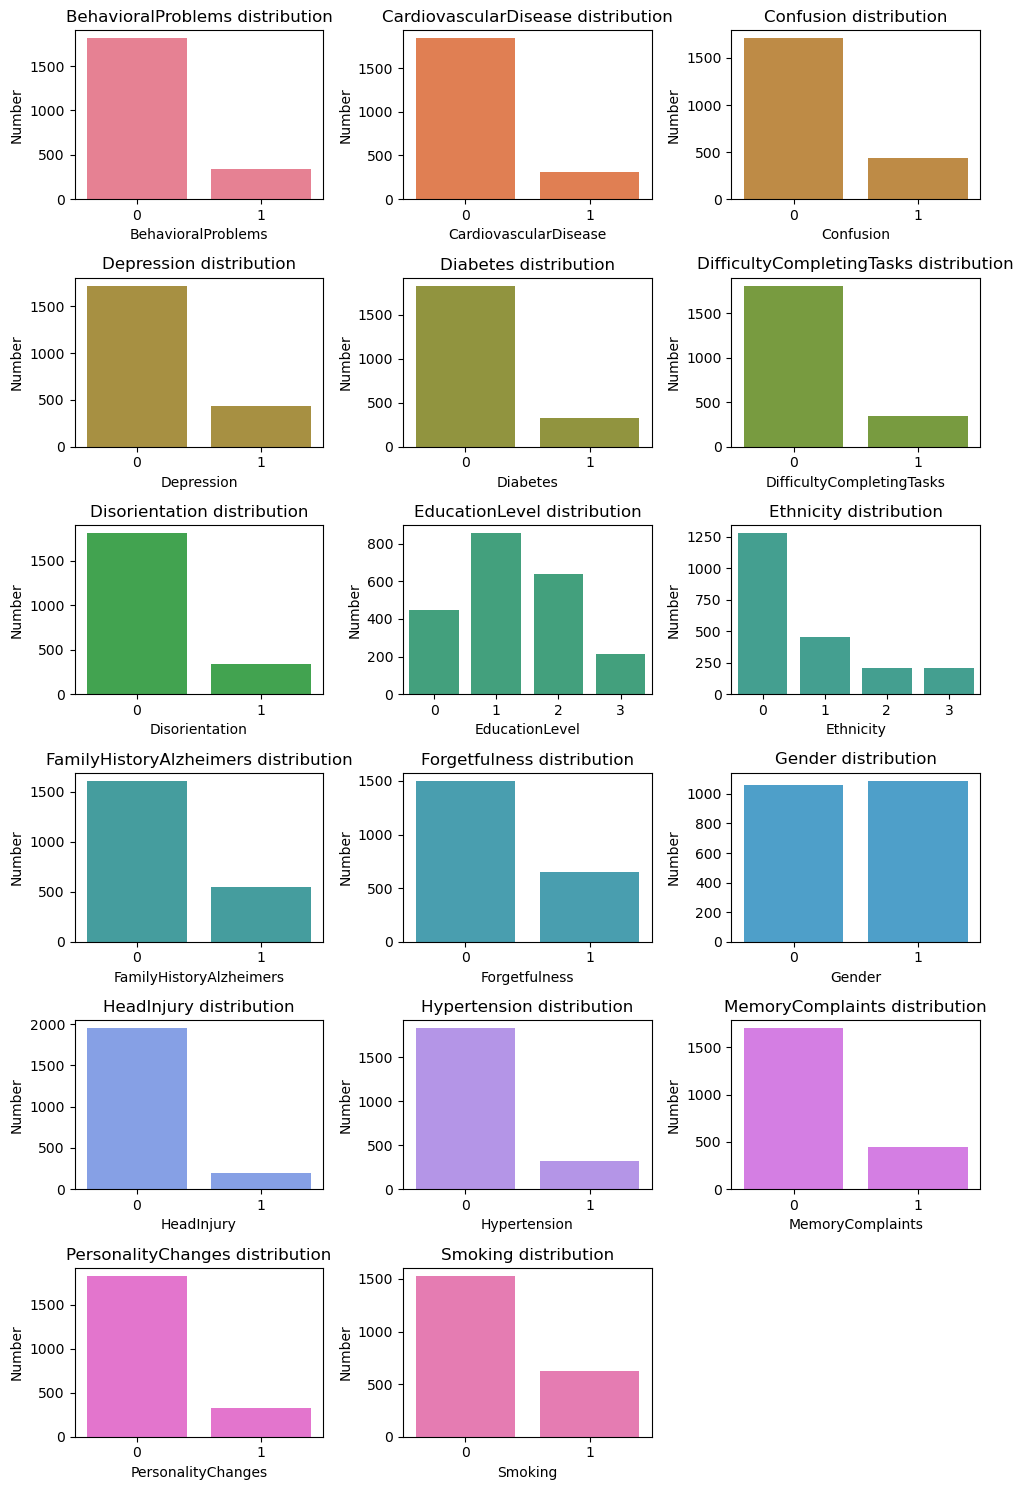

In [34]:
# Defining the color palette
palette_cat = sns.color_palette("husl", len(colonnes_cat))

# Graphical representation of each column
plt.figure(figsize=(10,15))
for i, colonne in enumerate(colonnes_cat):
    plt.subplot((len(colonnes_cat) + 2) // 3, 3, i + 1)
    sns.countplot(x=df[colonne], color=palette_cat[i])
    plt.title(f'{colonne} distribution')
    plt.xlabel(colonne)
    plt.ylabel('Number')
plt.tight_layout()
plt.show()

- Overall, the dataset is comprised of mostly healthy patients with no health issues.
- The most represented education level is high school, followed by bachelor's degrees. This is a crucial factor to consider, as many studies show that education level can play a protective role against Alzheimer's disease, often described as "cognitive reserve". A higher level of education could potentially delay the onset of symptoms of the disease.
- Caucasians are the most widely represented in this dataset. This ethnic overrepresentation could limit the applicability of the results to more diverse populations. Yet, it is essential to recognize that ethnicity can influence both the prevalence of Alzheimer's disease and how it is diagnosed or perceived. It is therefore important to take this variable into account when interpreting the results.
- Men and women are equally represented in this dataset. This balance is relevant because although Alzheimer's disease affects both sexes, studies indicate that women are more likely to develop the disease, particularly after the age of 80. This balanced distribution therefore allows for a comparative analysis between the sexes, which is essential for understanding potential differences in the manifestation and progression of the disease.


### 3.3.2 - Distribution as a function of the Diagnosis variable

For the analysis of categorical variables, the chi-square test is appropriate. The chi-square test compares the overall distribution of categories.

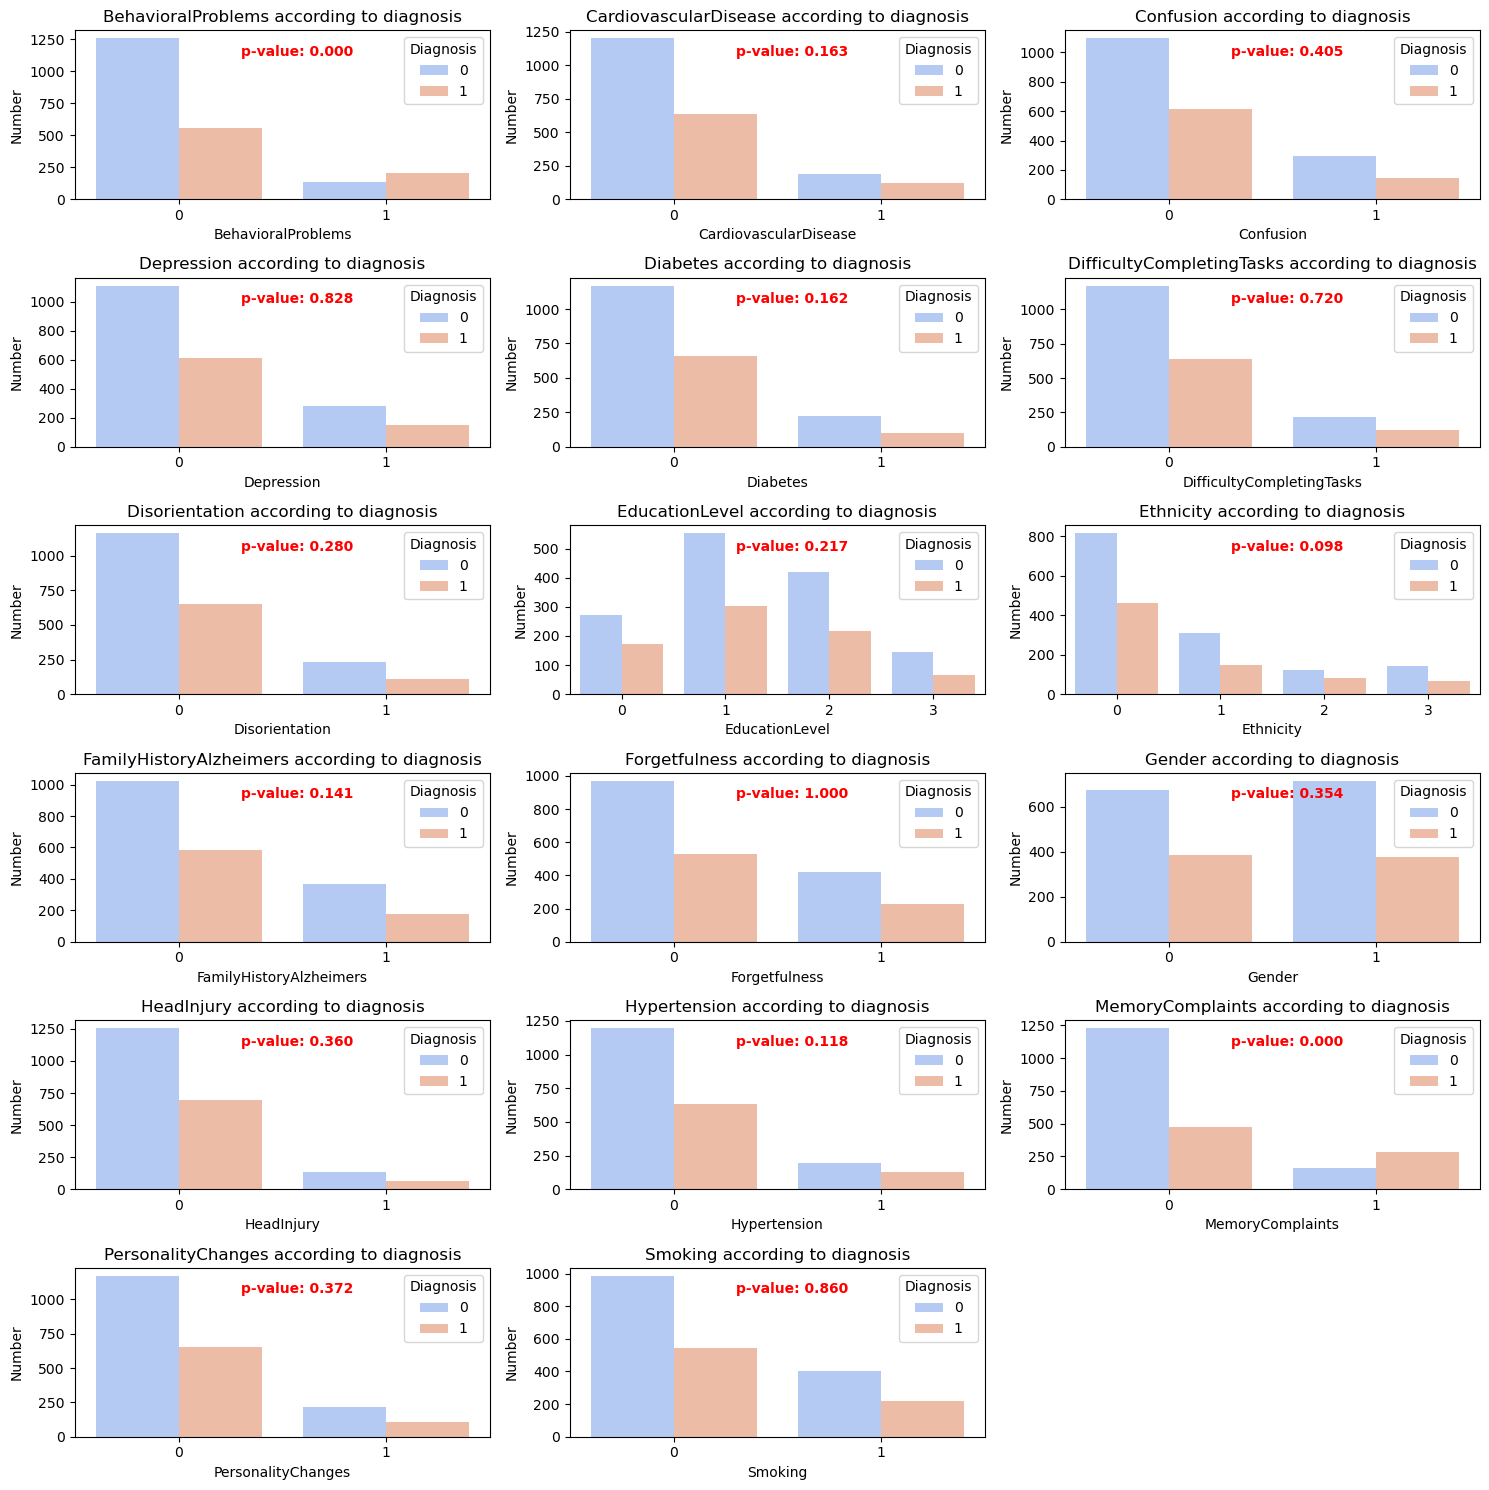

In [36]:
# Determine the number of colors needed
unique_diagnoses = df['Diagnosis'].nunique()

# Graphical representation of each column as a function of the Diagnosis variable with significance test
plt.figure(figsize=(15,15))
for i, colonne in enumerate(colonnes_cat):
    plt.subplot((len(colonnes_cat) + 2) // 3, 3, i + 1)
    sns.countplot(x=colonne, hue='Diagnosis', data=df, palette="coolwarm")
    plt.title(f'{colonne} according to diagnosis')
    plt.xlabel(colonne)
    plt.ylabel('Number')
    
    # Chi² test
    contingency_table = pd.crosstab(df[colonne], df["Diagnosis"])
    chi2_stat, p_value, dof, ex = chi2_contingency(contingency_table)
    
    # Displaying p-value on the graph
    plt.annotate(f'p-value: {p_value:.3f}', 
                 xy=(0.4, 0.85), xycoords='axes fraction', 
                 fontsize=10, color='red', weight='bold')

plt.tight_layout()
plt.show()

**Variables with very low p-values ​​(indicating significant association)**

- **BehavioralProblems (p-value = 0.000)**: A very strong association is observed between behavioral problems and diagnosis. The literature highlights that behavioral changes, such as agitation, aggression, and wandering, are often observed in patients with Alzheimer's disease, especially in the advanced stages.
- **MemoryComplaints (p-value = 0.000)**: Memory complaints are also strongly associated with diagnosis. This is consistent with the diagnostic criteria for Alzheimer's disease, where memory impairment, including difficulty remembering recent events, is an early and central symptom**Variables with moderately high p-values ​​(no significant association but to be monitored)**

- **Ethnicity (p-value = 0.098)**: Although not statistically significant, ethnicity could play a role in the prevalence or perception of Alzheimer's symptoms. It is important to note that in this dataset, Caucasians are significantly more represented than other ethnic groups. This could influence the results, limiting the ability to detect a significant association for this variable. Some studies have shown differences in the prevalence of dementia among different ethnic groups, likely due to genetic, socioeconomic, or cultural factors.
- **Hypertension (p-value = 0.118)**: Hypertension is a modifiable risk factor for many cardiovascular diseases, and it has also been linked to an increased risk of developing dementia, including Alzheimer's disease.
- **CardiovascularDisease (p-value = 0.163)** and **Diabetes (p-value = 0.162)**: These two conditions, although not significantly associated with the diagnosis in this sample, are recognized in the literature for their role in increasing the risk of developing Alzheimer's disease. The lack of statistical association here could reflect the complexity of the interactions between these chronic diseases and dementia, which can be influenced by many confounding factors, including the duration and severity of these conditions.Variables with high p-values ​​(no significant association)cative**Confusion (p-value = 0.405), Disorientation (p-value = 0.280), Forgetfulness (p-value = 1.000)**: Although these symptoms are commonly associated with Alzheimer's disease, the high p-values ​​indicate that there is no statistically significant association in this sample. This lack of association could be due to limitations in sample quality or size, or variability in how these symptoms were reported or measured.esu**Depression (p-value = 0.828)** and **PersonalityChange (p-value = 0.372)**: Depression and personality changes are often observed in patients with dementia, including Alzheimer's, but in this sample they did not show a significant association with diagnosis. This could be due to the difficulty in diagnosing these symptoms objectively or their occurrence in various neurological conditions.
- **EducationLevel (p-value = 0.217)**: Education level has been studied as a protective factor against dementia due to cognitive reserve, but here no significant association was found. This may be due to the lack of variability in this dataset, with a majority of patients having completed secondary education.nd**Gender (p-value = 0.354)**: Although women are often more affected by Alzheimer's disease, which could be linked to a longer life expectancy, this analysis did not find a statistically significant link between gender and diagnosis.nostic. 

# V- Conclusion 




This exploratory data analysis on Alzheimer's disease highlights several factors significantly associated with this neurodegenerative condition. The results suggest that parameters such as age, BMI, alcohol consumption, physical activity, sleep quality, and various biological indicators (blood pressure, cholesterol) may play a role in the progression of the disease.

Identifying these associations could contribute to a better understanding of risk factors and pave the way for targeted prevention strategies. Additional analyses, including longitudinal studies and more in-depth modeling, would be necessary to confirm these trends and explore potential underlying mechanisms
.
Thus, this study underscores the importance of a multidimensional approach to better comprehend Alzheimer's disease and promote both prevention and early intervention. Alzheimer’s disease is multifactorial.